In [1]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 3,540 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [108]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, adjusted_rand_score
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import mglearn

### Step 1: Load your data, including testing/training split from Project 1.

In [3]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

In [4]:
## I had big issues with my test set, and after trying different methods,
## I found the solution was dropping the underrepresented neigborhoods from the beginning of the analysis

In [5]:
neig_count = manhattan["neighborhood"].value_counts()

In [6]:
data = neig_count[neig_count > 3]
data

Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
Lower East Side         41
East Harlem             41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Name: neighborhood, dtype: int64

In [7]:
manhattan2 = manhattan[manhattan['neighborhood'].isin(data.index)]

In [8]:
manhattan2.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [9]:
y = manhattan2["rent"]
print(y.head()) # y variable

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [10]:
X = manhattan2.drop(["rent"], axis=1)
print(X.head()) # X variable

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [11]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [12]:
X_train.shape #33% of the data

(2365, 17)

In [13]:
X_test.shape #67% of the data

(1165, 17)

## Training Set

In [14]:
X_train_cleaned = X_train.copy() # copy of train dataset

In [15]:
X_train_cleaned.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [16]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_train_cleaned = X_train_cleaned.drop(["borough"], axis=1)

In [17]:
#using get_dummies() to prepare data for modeling 

X_train_cleaned = pd.get_dummies(data=X_train_cleaned, drop_first=True)
X_train_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Midtown West,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
520,8405,2.0,2,1644,1,5.0,89,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2587,4843,3.0,1,1100,9,15.0,86,1,1,1,...,0,0,0,0,0,0,0,0,0,0
768,2152,2.0,1,700,5,5.0,96,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1775,2578,0.0,1,583,4,17.0,47,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1870,11330,1.0,2,850,0,7.0,56,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
X_train_cleaned.shape

(2365, 42)

## Test Set

In [19]:
X_test_cleaned = X_test.copy()

In [20]:
X_test_cleaned.isnull().sum() # not missisng values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [21]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_test_cleaned = X_test_cleaned.drop(["borough"], axis=1)

In [22]:
#using get_dummies() to prepare data for modeling 

X_test_cleaned = pd.get_dummies(data=X_test_cleaned, drop_first=True)
X_test_cleaned.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Midtown West,neighborhood_Morningside Heights,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village
203,4626,1.0,1,643,3,32.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2244,284,1.0,1,664,2,19.0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,6368,2.0,2,1050,4,2.0,11,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1572,6147,1.0,1,693,3,6.0,15,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1656,7652,1.0,1,730,9,9.0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_test_cleaned.shape

(1165, 42)

## Step 2: PCA for feature selection

In [24]:
print(X_train_cleaned.shape) # WORKING WITH TRAINING DATA ONLY

(2365, 42)


In [25]:
print(y_train.shape) ## NO NEEDED FOR PCA SINCE THIS IS UNSUPERVISED MACHINE LEARNING

(2365,)


## Running Principal Component Analysis (PCA) on SCALED data

In [26]:
## SCALING DATA BEFORE RUNNING ANALYSIS
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_cleaned)
X_scaled = scaler.transform(X_train_cleaned) # training set
scaler.fit(X_test_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned) # test set

### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso ## No Pre-Processing

model2=Lasso(alpha=1.0, max_iter=1000000).fit(X_train_cleaned, y_train)# unscaled set

print("Training unscaled set R^2: {:.2f}".format(model2.score(X_train_cleaned, y_train)))
print("Test unscaled set R^2: {:.2f}".format(model2.score(X_test_cleaned, y_test)))

Training unscaled set R^2: 0.82
Test unscaled set R^2: 0.82


In [28]:
from sklearn.linear_model import Lasso ##processed
from sklearn.decomposition import PCA
# principal components of the data
pca1 = PCA(n_components=0.95)
# fit PCA model to data
pca1.fit(X_scaled)
nfeatures = str(pca1.n_components_) # counting number of components after scaling

#lasso regression to compare values from previous assignment using best parameter
model=Lasso(alpha=1.0, max_iter=1000000).fit(X_scaled, y_train) #scaled set

print(nfeatures + " COMPONENTS ARE NEEDED TO CAPTURE 95% OF THE VARIANCE")
print("\n")
print("Training scaled set R^2: {:.2f}".format(model.score(X_scaled, y_train)))
print("Test scaled set R^2: {:.2f}".format(model.score(X_test_scaled, y_test)))
print("\n")
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_) 
print("\n")

35 COMPONENTS ARE NEEDED TO CAPTURE 95% OF THE VARIANCE


Training scaled set R^2: 0.82
Test scaled set R^2: 0.81


--------------------Explained variance ratio--------------------
[0.08293302 0.06382097 0.04440796 0.03285115 0.02952885 0.02812069
 0.02758698 0.02689396 0.02640683 0.02552858 0.02541135 0.02514428
 0.0248704  0.02461351 0.02454576 0.02440714 0.0243324  0.02427706
 0.02424576 0.0241551  0.0240661  0.02405109 0.02399666 0.02395867
 0.02394178 0.02389551 0.02367673 0.02302445 0.02207529 0.02077937
 0.02036879 0.01852809 0.01648726 0.01576259 0.01284469]




### Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor ## No Pre-Processing

model2=DecisionTreeRegressor(max_depth=4).fit(X_train_cleaned, y_train)# unscaled set

print("Training unscaled set R^2: {:.2f}".format(model2.score(X_train_cleaned, y_train)))
print("Test unscaled set R^2: {:.2f}".format(model2.score(X_test_cleaned, y_test)))

Training unscaled set R^2: 0.80
Test unscaled set R^2: 0.77


In [30]:


# principal components of the data
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_scaled)
nfeatures = str(pca2.n_components_) # counting number of components after scaling

#lasso regression to compare values from previous assignment using best parameter
model=DecisionTreeRegressor(max_depth=4).fit(X_scaled, y_train) #scaled set

print(nfeatures + " COMPONENTS ARE NEEDED TO CAPTURE 95% OF THE VARIANCE")
print("\n")
print("Training scaled set R^2: {:.2f}".format(model.score(X_scaled, y_train)))
print("Test scaled set R^2: {:.2f}".format(model.score(X_test_scaled, y_test)))
print("\n")
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_) 
print("\n")

35 COMPONENTS ARE NEEDED TO CAPTURE 95% OF THE VARIANCE


Training scaled set R^2: 0.80
Test scaled set R^2: 0.77


--------------------Explained variance ratio--------------------
[0.08293302 0.06382097 0.04440796 0.03285115 0.02952885 0.02812069
 0.02758698 0.02689396 0.02640683 0.02552858 0.02541135 0.02514428
 0.0248704  0.02461351 0.02454576 0.02440714 0.0243324  0.02427706
 0.02424576 0.0241551  0.0240661  0.02405109 0.02399666 0.02395867
 0.02394178 0.02389551 0.02367673 0.02302445 0.02207529 0.02077937
 0.02036879 0.01852809 0.01648726 0.01576259 0.01284469]




### Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.

### Manhattan Dataset

Text(0, 0.5, 'Feature 1')

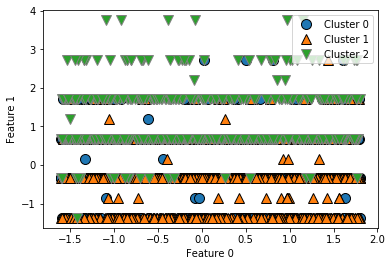

In [32]:
# build the clustering model with the manhattan dataset dataset which does not lend itselt to clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Breast Cancer Dataset

In [47]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [59]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
data = load_breast_cancer()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data.data, data.target):
    X_train2 = data.data[train_index]
    X_test2 = data.data[test_index]
    y_train2 = data.target[train_index]
    y_test2 = data.target[test_index]


### PCA ON THE BREAST CANCER DATASET

In [60]:
from sklearn.preprocessing import StandardScaler # scaling data

scaler = StandardScaler()
scaler.fit(X_train2.data)
X_scaled2 = scaler.transform(X_train2.data)

In [61]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)


silhouette_coefficients  0.632425923745216
ARI  0.535672673125643


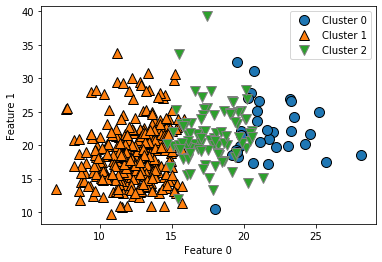

In [109]:
# build the clustering model unprocessed dataset
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
score = str(silhouette_score(X_train2, assignments))
ari = adjusted_rand_score(y_train2, assignments)
print("silhouette_coefficients ", score)
print("ARI ", ari)

ValueError: labels_true and labels_pred must have same size, got 455 and 569

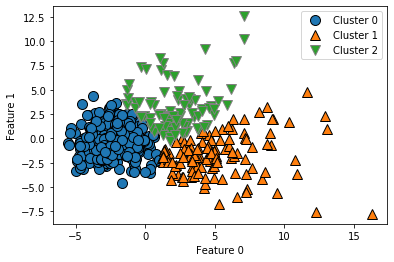

In [110]:
# build the clustering model with scaled
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
score = str(silhouette_score(X_pca2, assignments))
ari = adjusted_rand_score(y_train2, assignments)
print("silhouette_coefficients ", score)
print("ARI ", ari)

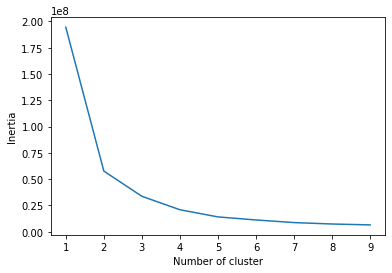

In [65]:
inertiaVals = {} # elbow visualization with unprocessed data

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train2)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

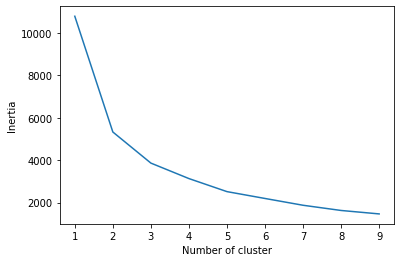

In [66]:
inertiaVals = {} # elbow visualization with scaled data

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_pca2)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

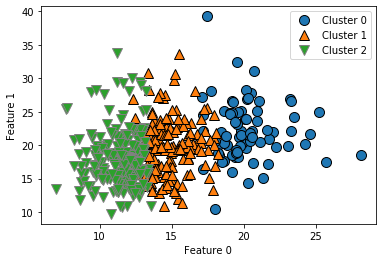

In [67]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train2)

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

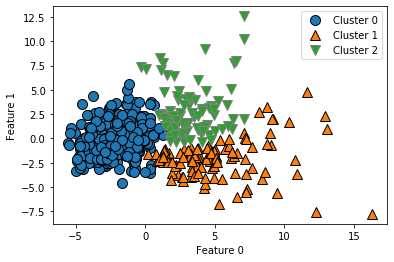

In [68]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_pca2)

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

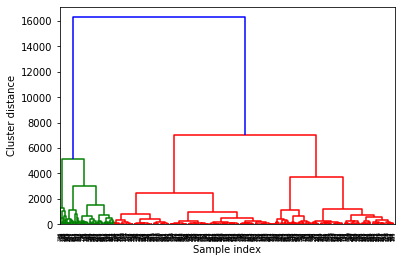

In [71]:
# using unprocessed data
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train2)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Cluster distance')

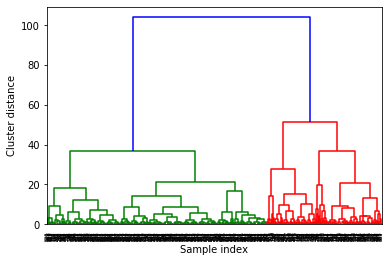

In [72]:
# using scaled dataset

linkage_array = ward(X_pca2)

dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

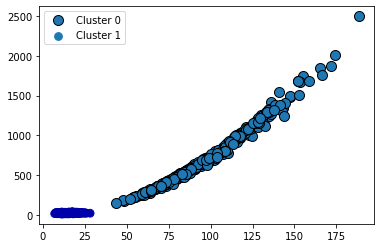

In [96]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.5)
clusters = dbscan.fit_predict(X_train2)

# plot the cluster assignments using unporcessed data
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train2[:, 2], X_train2[:, 3], clusters, padding=0.1)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
#plt.xlabel("Feature 2")
#plt.ylabel("Feature 3")

IndexError: index 2 is out of bounds for axis 1 with size 2

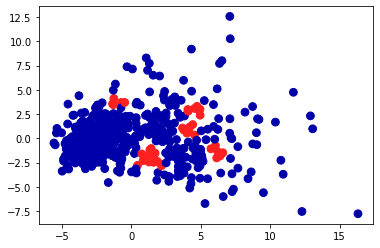

In [97]:
dbscan = DBSCAN(min_samples=6,eps=0.7)
clusters = dbscan.fit_predict(X_pca2)

# plot the cluster assignments using scaled data
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca2[:, 2], X_pca2[:, 3], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")